## IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from scipy.stats import ttest_ind
from matplotlib_venn import venn3

## LOAD DATA

Load target variables

In [2]:
path = "data/subject_clinical_data.xlsx"
clinical_data = pd.read_excel(path)
clinical_data = clinical_data.drop(columns=["id"])

Load brain networks

In [3]:
brain_networks = np.empty((clinical_data.shape[0], 3, 76, 76))

def getFileName(i):
    name = str(i)
    while len(name) < 4:
        name = "0"+name
    name = name+".csv"
    return name

for i in range(clinical_data.shape[0]):
    file_name = getFileName(i)
    fa = pd.read_csv("data/FA/"+file_name, header=None)
    brain_networks[i,0,:,:] = np.array(fa)
    gm = pd.read_csv("data/GM/"+file_name, header=None)
    brain_networks[i,1,:,:] = np.array(gm)
    rs = pd.read_csv("data/RS/"+file_name, header=None)
    brain_networks[i,2,:,:] = np.array(rs)

Load node names

In [4]:
node_names = pd.read_csv("data/nodes.csv", index_col=0)
node_names = node_names.drop(columns='region_id')

Constants

In [135]:
NUM_NODES = 76
NUM_ARESTES = int((NUM_NODES*(NUM_NODES-1))/2)

## DATA ANALYSIS

### Exploració de clinical data

In [6]:
print("Shape: ", clinical_data.shape)
clinical_data

Shape:  (143, 2)


,mstype,edss
0,0,3.0
1,0,1.5
2,0,2.0
3,0,3.0
4,0,2.0
...,...,...
138,-1,0.0
139,-1,0.0
140,-1,0.0
141,-1,0.0


In [7]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mstype  143 non-null    int64  
 1   edss    143 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [8]:
clinical_data.describe()

,mstype,edss
count,143.000000,143.000000
mean,-0.125874,1.846154
std,0.332873,1.245033
min,-1.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.500000
75%,0.000000,2.500000
max,0.000000,6.000000


<AxesSubplot: xlabel='edss', ylabel='Count'>

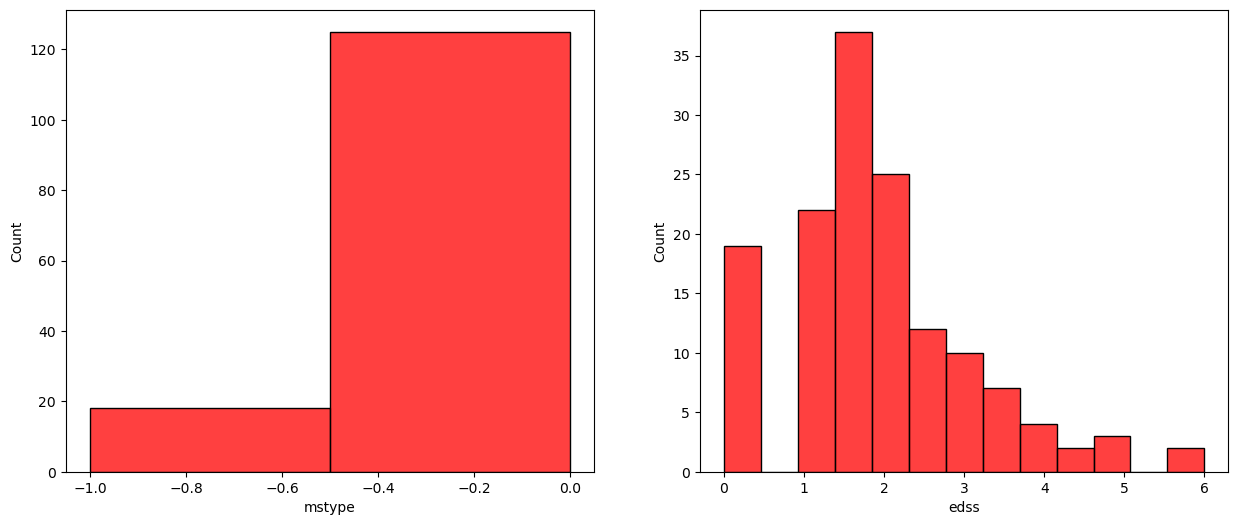

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.histplot(x=clinical_data['mstype'], color ='red', ax=axes[0],bins=2)
sns.histplot(x=clinical_data['edss'], color ='red', ax=axes[1],bins=13)

In [10]:
print(clinical_data['mstype'].value_counts(), "\n")
print(clinical_data['edss'].value_counts())

mstype
 0    125
-1     18
Name: count, dtype: int64 

edss
1.5    37
2.0    25
1.0    22
0.0    19
2.5    12
3.0    10
3.5     7
4.0     4
5.0     3
6.0     2
4.5     2
Name: count, dtype: int64


In [11]:
print(clinical_data[clinical_data['edss']==0])

     mstype  edss
32        0   0.0
73       -1   0.0
74       -1   0.0
75       -1   0.0
76       -1   0.0
77       -1   0.0
78       -1   0.0
79       -1   0.0
80       -1   0.0
81       -1   0.0
82       -1   0.0
135      -1   0.0
136      -1   0.0
137      -1   0.0
138      -1   0.0
139      -1   0.0
140      -1   0.0
141      -1   0.0
142      -1   0.0


### Exploració de les xarxes cerebrals

In [12]:
print("Número de subjectes: ", brain_networks.shape[0])
print("Mida de les xarxes: ", brain_networks.shape[2:])

Número de subjectes:  143
Mida de les xarxes:  (76, 76)


#### Xarxes FA

In [13]:
fa = brain_networks[:,0,:,:]

fa_values = fa.flatten()
print(fa_values)
print(fa_values.shape)

[0.         0.43570114 0.         ... 0.4248559  0.39936464 0.        ]
(825968,)


In [14]:
pd.DataFrame(fa_values).describe()

,0
count,825968.000000
mean,0.236047
std,0.207528
min,0.000000
25%,0.000000
50%,0.319193
75%,0.422540
max,0.867121


[Text(0.5, 1.0, 'Histograma de valors de les matrius FA')]

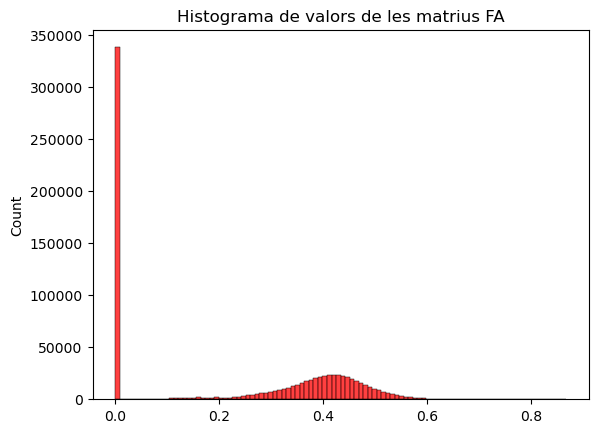

In [15]:
sns.histplot(x=fa_values, color ='red', bins=100).set(title='Histograma de valors de les matrius FA')

In [16]:
print("Nombre d'arestes que son 0: ", np.count_nonzero(fa_values == 0))

Nombre d'arestes que son 0:  337944


[Text(0.5, 1.0, 'Histograma de valors de les matrius FA sense contar els 0')]

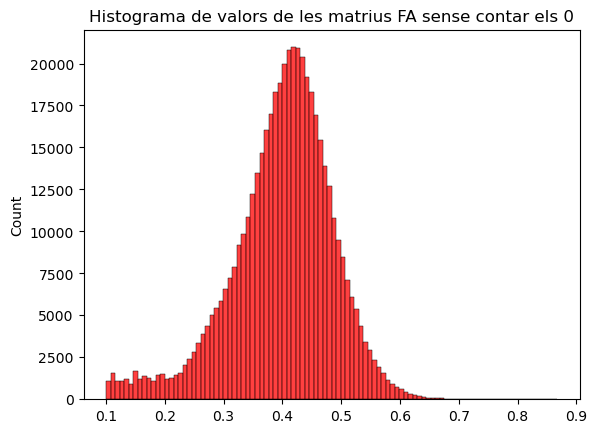

In [17]:
fa_values_non_zero = fa_values[np.nonzero(fa_values > 0)[0]]

sns.histplot(x=fa_values_non_zero, color ='red', bins=100).set(title='Histograma de valors de les matrius FA sense contar els 0')

#### Xarxes GM

In [18]:
gm = brain_networks[:,1,:,:]

gm_values = gm.flatten()
print(gm_values)
print(gm_values.shape)

[0.         0.01977221 0.01685782 ... 0.16536942 0.03532892 0.        ]
(825968,)


In [19]:
pd.DataFrame(gm_values).describe()

,0
count,825968.000000
mean,0.069399
std,0.087333
min,0.000000
25%,0.018075
50%,0.039771
75%,0.083131
max,1.000000


[Text(0.5, 1.0, 'Histograma de valors de les matrius GM')]

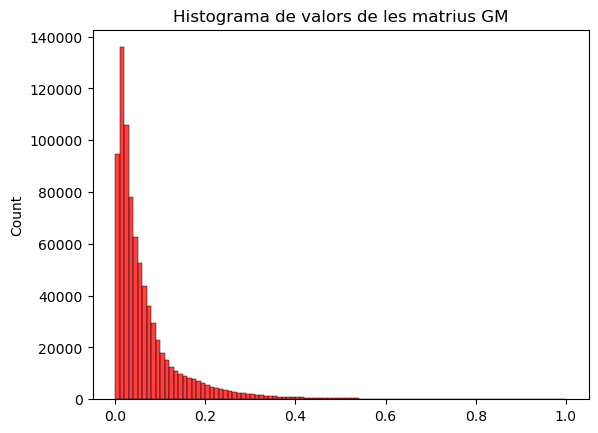

In [20]:
sns.histplot(x=gm_values, color ='red', bins=100).set(title='Histograma de valors de les matrius GM')

In [21]:
print("Nombre d'arestes que son 0: ", np.count_nonzero(gm_values == 0))

Nombre d'arestes que son 0:  10946


[Text(0.5, 1.0, 'Histograma de valors de les matrius GM sense contar els 0')]

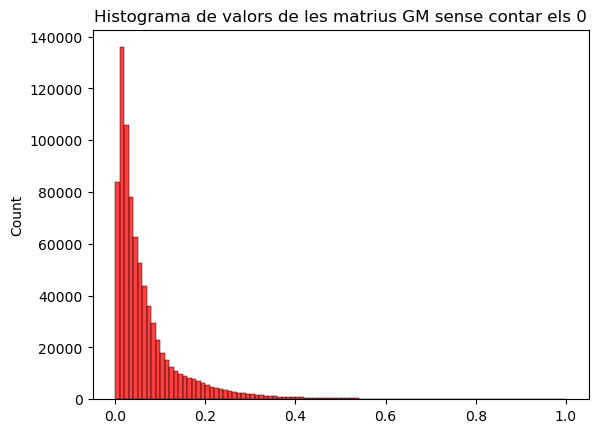

In [22]:
gm_values_non_zero = gm_values[np.nonzero(gm_values > 0)[0]]

sns.histplot(x=gm_values_non_zero, color ='red', bins=100).set(title='Histograma de valors de les matrius GM sense contar els 0')

#### Xarxes RS

In [23]:
rs = brain_networks[:,2,:,:]

rs_values = rs.flatten()
print(rs_values)
print(rs_values.shape)

[0.         0.69056623 0.30572181 ... 0.66556017 0.5175166  0.        ]
(825968,)


In [24]:
pd.DataFrame(rs_values).describe()

,0
count,825968.000000
mean,0.285672
std,0.206543
min,0.000000
25%,0.115738
50%,0.249507
75%,0.421852
max,1.000000


[Text(0.5, 1.0, 'Histograma de valors de les matrius RS')]

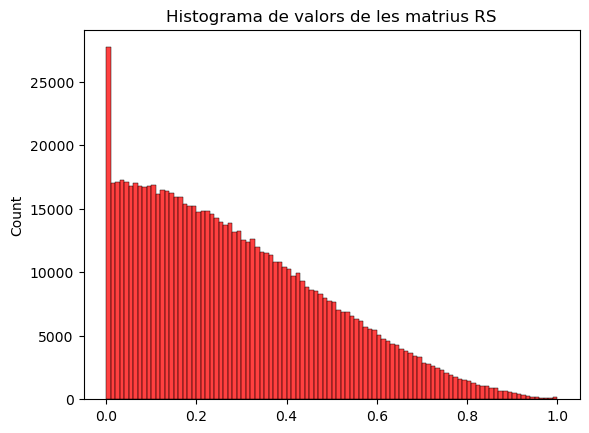

In [25]:
sns.histplot(x=rs_values, color ='red', bins=100).set(title='Histograma de valors de les matrius RS')

In [26]:
print("Nombre d'arestes que son 0: ", np.count_nonzero(rs_values == 0))

Nombre d'arestes que son 0:  10868


[Text(0.5, 1.0, 'Histograma de valors de les matrius RS sense contar els 0')]

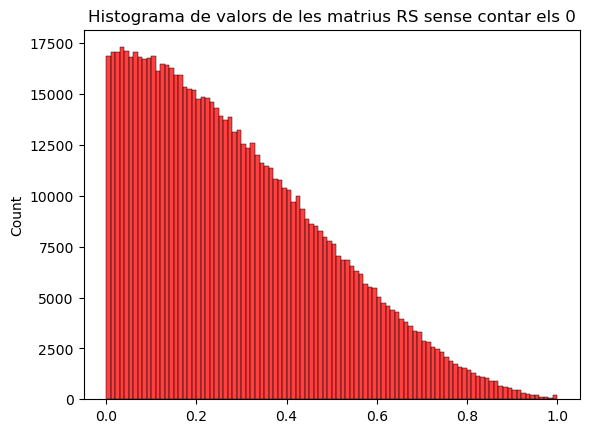

In [27]:
rs_values_non_zero = rs_values[np.nonzero(rs_values > 0)[0]]

sns.histplot(x=rs_values_non_zero, color ='red', bins=100).set(title='Histograma de valors de les matrius RS sense contar els 0')

### Anàlisi dels grups (Healthy Volunteers i People with MS)

In [28]:
HV_index = clinical_data['mstype'] == -1
PwMS_index = clinical_data['mstype'] == 0

#### Anàlisi a partir dels nodes (amb el sumatori de totes les seves arestes)

En aquest apartat es fa un anàlisi de què tan útil és cada node per distingir entre els grups HV i PwMS. Per fer-ho, s'utilitzarà el sumatori dels pesos de totes les arestes connectades a cada node, és a dir la mètrica degree.

In [29]:
def get_nodes_sum(mat):
    nodes_sum = np.empty((mat.shape[:2]))
    for i in range(nodes_sum.shape[0]):
        for j in range(nodes_sum.shape[1]):
            nodes_sum[i][j] = np.sum(mat[i][j])
    return nodes_sum

In [30]:
def get_p_values_nodes(HV_nodes_sum, PwMS_nodes_sum):
    p_values = np.array([])
    for i in range(NUM_NODES):
        _ , p_value = ttest_ind(HV_nodes_sum[:,i], PwMS_nodes_sum[:,i], equal_var=False)
        p_values = np.append(p_values, p_value)
    return p_values

##### Amb les xarxes FA:

In [31]:
# Matriu que per cada persona conté el degree de tots els nodes
fa_nodes_sum = get_nodes_sum(fa)

In [32]:
# Es separa entre HV i PwMS
HV_fa_nodes_sum = fa_nodes_sum[HV_index, :]
PwMS_fa_nodes_sum = fa_nodes_sum[PwMS_index, :]

print(HV_fa_nodes_sum.shape)
print(PwMS_fa_nodes_sum.shape)

(18, 76)
(125, 76)


Boxplots dels valors de degree per cada node:

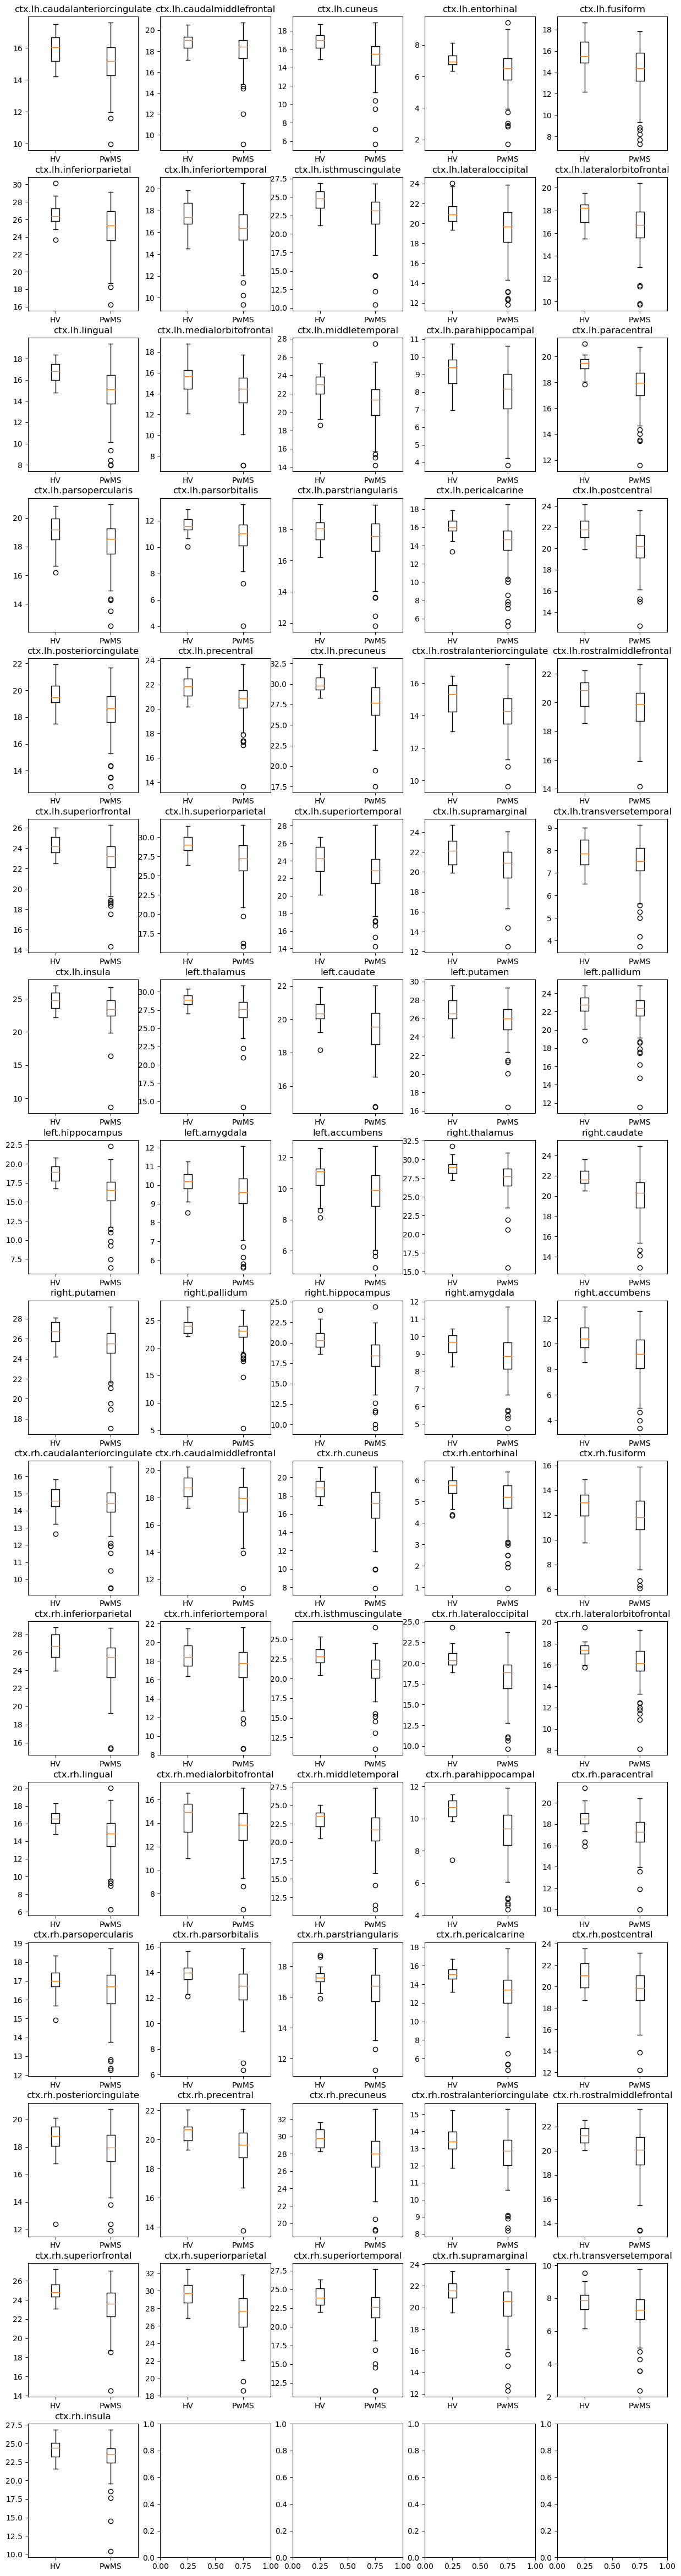

In [33]:
fig, axes = plt.subplots(16,5, figsize=(15,60))

for i in range(fa_nodes_sum.shape[1]):
    data = [HV_fa_nodes_sum[:,i], PwMS_fa_nodes_sum[:,i]]
    row = int(i/5)
    column = i%5
    axes[row, column].boxplot(data, labels=['HV', 'PwMS'])
    axes[row, column].set_title(node_names['region_name'][i])

A continuació, es comprova que la variancia de les mostres per cada node no té per què ser semblant.

In [34]:
print("            HV             PwMS")
print("----------------------------------")
for i in range(NUM_NODES):
    print("Node ", i, ": ", round(np.var(HV_fa_nodes_sum[:,i]),2), " -------- ", round(np.var(PwMS_fa_nodes_sum[:,i]),2))

            HV             PwMS
----------------------------------
Node  0 :  0.82  --------  1.67
Node  1 :  0.7  --------  2.56
Node  2 :  1.0  --------  4.14
Node  3 :  0.27  --------  1.47
Node  4 :  2.1  --------  5.11
Node  5 :  2.38  --------  6.13
Node  6 :  2.01  --------  3.73
Node  7 :  2.05  --------  6.93
Node  8 :  1.73  --------  6.19
Node  9 :  1.11  --------  3.44
Node  10 :  0.87  --------  4.89
Node  11 :  2.16  --------  3.43
Node  12 :  3.31  --------  4.92
Node  13 :  1.18  --------  1.97
Node  14 :  0.6  --------  2.35
Node  15 :  1.44  --------  2.22
Node  16 :  0.55  --------  1.71
Node  17 :  0.8  --------  1.97
Node  18 :  0.96  --------  5.55
Node  19 :  1.38  --------  3.19
Node  20 :  1.09  --------  2.56
Node  21 :  0.8  --------  1.84
Node  22 :  1.33  --------  5.46
Node  23 :  0.95  --------  1.7
Node  24 :  1.11  --------  2.29
Node  25 :  0.92  --------  3.65
Node  26 :  1.95  --------  7.7
Node  27 :  3.51  --------  5.12
Node  28 :  2.01  -------- 

Identifiquem tots els nodes que superen el t-test:

In [35]:
fa_nodes_p_values = get_p_values_nodes(HV_fa_nodes_sum, PwMS_fa_nodes_sum)

fa_nodes_t_test = np.where(fa_nodes_p_values<0.05)[0]
print("Número de nodes que superen el t-test: ", fa_nodes_t_test.shape[0], "\n")
node_indexs = np.argsort(fa_nodes_p_values)[:fa_nodes_t_test.shape[0]]
print(node_names['region_name'][node_indexs])

Número de nodes que superen el t-test:  73 

63          ctx.rh.pericalcarine
39                 right.caudate
14            ctx.lh.paracentral
35              left.hippocampus
22              ctx.lh.precuneus
                 ...            
75                 ctx.rh.insula
17       ctx.lh.parstriangularis
56    ctx.rh.medialorbitofrontal
60        ctx.rh.parsopercularis
15        ctx.lh.parsopercularis
Name: region_name, Length: 73, dtype: object


##### Amb les xarxes GM:

In [36]:
# Matriu que per cada persona conté el degree de tots els nodes
gm_nodes_sum = get_nodes_sum(gm)

In [37]:
# Es separa entre HV i PwMS
HV_gm_nodes_sum = gm_nodes_sum[HV_index, :]
PwMS_gm_nodes_sum = gm_nodes_sum[PwMS_index, :]

print(HV_gm_nodes_sum.shape)
print(PwMS_gm_nodes_sum.shape)

(18, 76)
(125, 76)


Boxplots dels valors de degree per cada node:

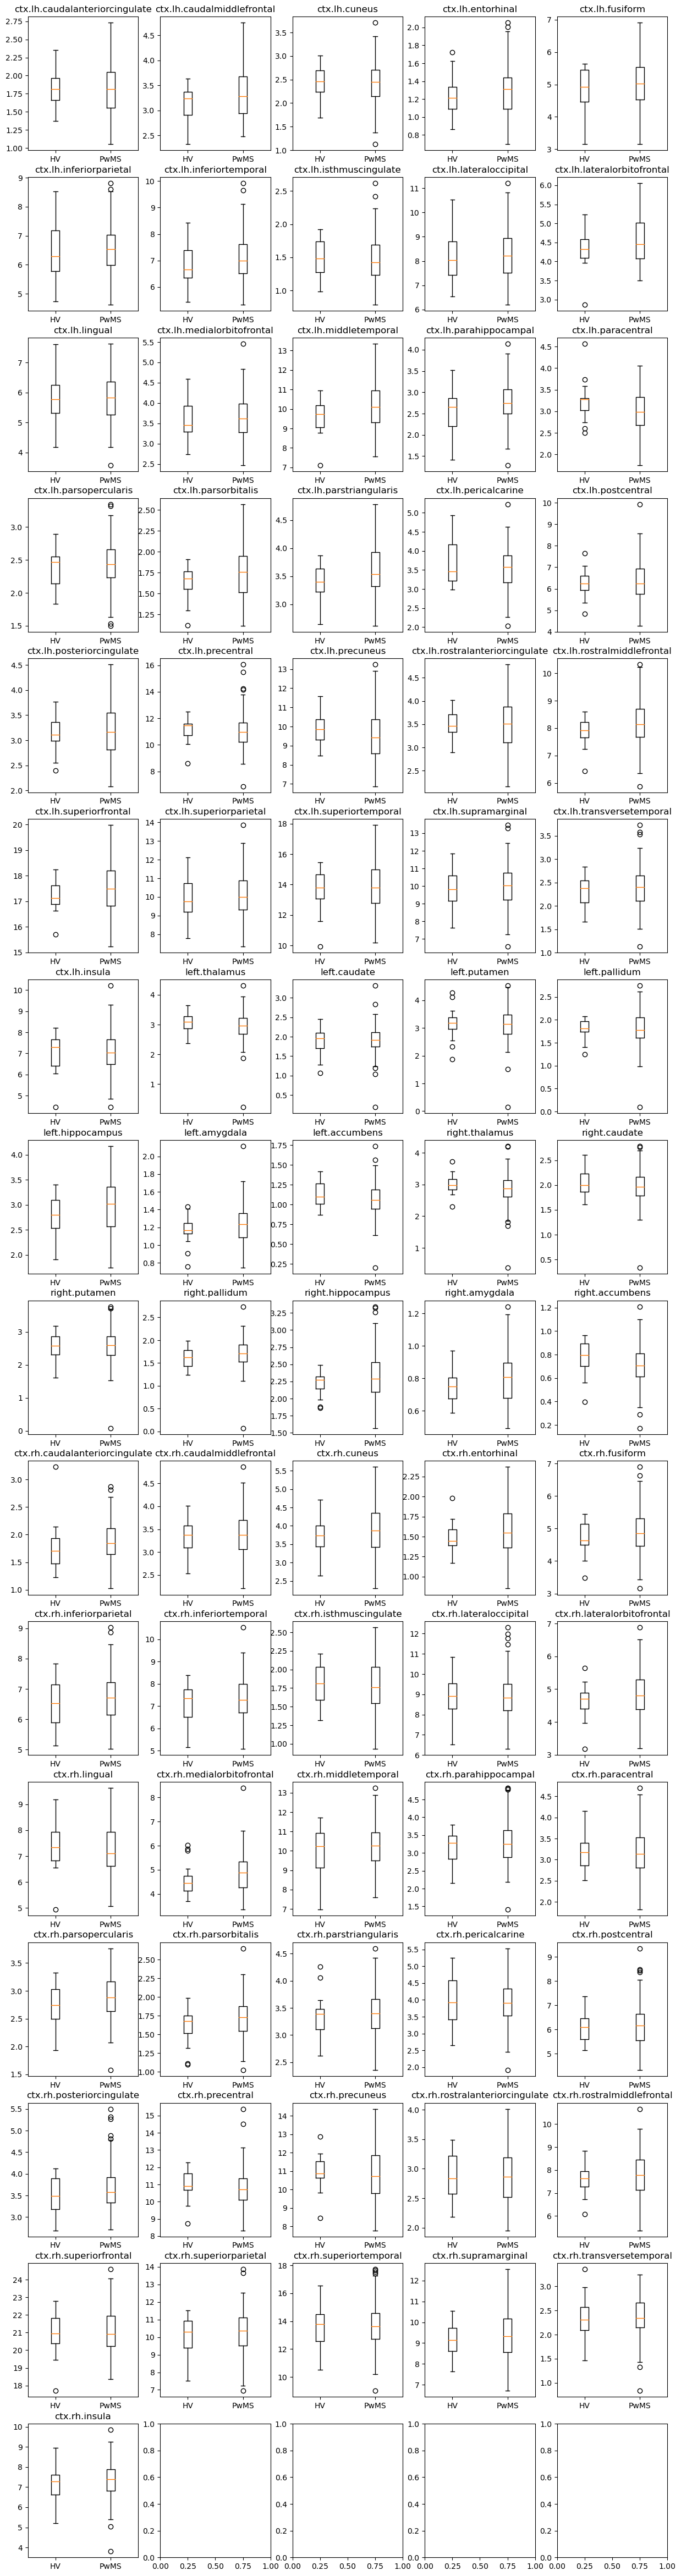

In [38]:
fig, axes = plt.subplots(16,5, figsize=(15,60))

for i in range(gm_nodes_sum.shape[1]):
    data = [HV_gm_nodes_sum[:,i], PwMS_gm_nodes_sum[:,i]]
    row = int(i/5)
    column = i%5
    axes[row, column].boxplot(data, labels=['HV', 'PwMS'])
    axes[row, column].set_title(node_names['region_name'][i])

A continuació, es comprova que la variancia de les mostres per cada node no té per què ser semblant.

In [39]:
print("            HV             PwMS")
print("----------------------------------")
for i in range(NUM_NODES):
    print("Node ", i, ": ", round(np.var(HV_gm_nodes_sum[:,i]),2), " -------- ", round(np.var(PwMS_gm_nodes_sum[:,i]),2))

            HV             PwMS
----------------------------------
Node  0 :  0.06  --------  0.12
Node  1 :  0.14  --------  0.26
Node  2 :  0.11  --------  0.21
Node  3 :  0.05  --------  0.07
Node  4 :  0.42  --------  0.49
Node  5 :  0.82  --------  0.67
Node  6 :  0.55  --------  0.84
Node  7 :  0.08  --------  0.11
Node  8 :  1.05  --------  0.95
Node  9 :  0.23  --------  0.35
Node  10 :  0.6  --------  0.63
Node  11 :  0.26  --------  0.29
Node  12 :  0.81  --------  1.35
Node  13 :  0.27  --------  0.23
Node  14 :  0.2  --------  0.2
Node  15 :  0.09  --------  0.13
Node  16 :  0.04  --------  0.09
Node  17 :  0.1  --------  0.21
Node  18 :  0.37  --------  0.29
Node  19 :  0.43  --------  0.9
Node  20 :  0.11  --------  0.27
Node  21 :  0.76  --------  1.72
Node  22 :  0.6  --------  1.58
Node  23 :  0.1  --------  0.3
Node  24 :  0.25  --------  0.71
Node  25 :  0.4  --------  0.99
Node  26 :  1.3  --------  1.45
Node  27 :  1.82  --------  2.47
Node  28 :  1.34  --------  1

Identifiquem tots els nodes que superen el t-test:

In [40]:
gm_nodes_p_values = get_p_values_nodes(HV_gm_nodes_sum, PwMS_gm_nodes_sum)

gm_nodes_t_test = np.where(gm_nodes_p_values<0.05)[0]
print("Número de nodes que superen el t-test: ", gm_nodes_t_test.shape[0], "\n")
node_indexs = np.argsort(gm_nodes_p_values)[:gm_nodes_t_test.shape[0]]
print(node_names['region_name'][node_indexs])

Número de nodes que superen el t-test:  5 

24    ctx.lh.rostralmiddlefrontal
17        ctx.lh.parstriangularis
42              right.hippocampus
43                 right.amygdala
35               left.hippocampus
Name: region_name, dtype: object


##### Amb les xarxes RS:

In [41]:
# Matriu que per cada persona conté el degree de tots els nodes
rs_nodes_sum = get_nodes_sum(rs)

In [42]:
# Es separa entre HV i PwMS
HV_rs_nodes_sum = rs_nodes_sum[HV_index, :]
PwMS_rs_nodes_sum = rs_nodes_sum[PwMS_index, :]

print(HV_rs_nodes_sum.shape)
print(PwMS_rs_nodes_sum.shape)

(18, 76)
(125, 76)


Boxplots dels valors de degree per cada node:

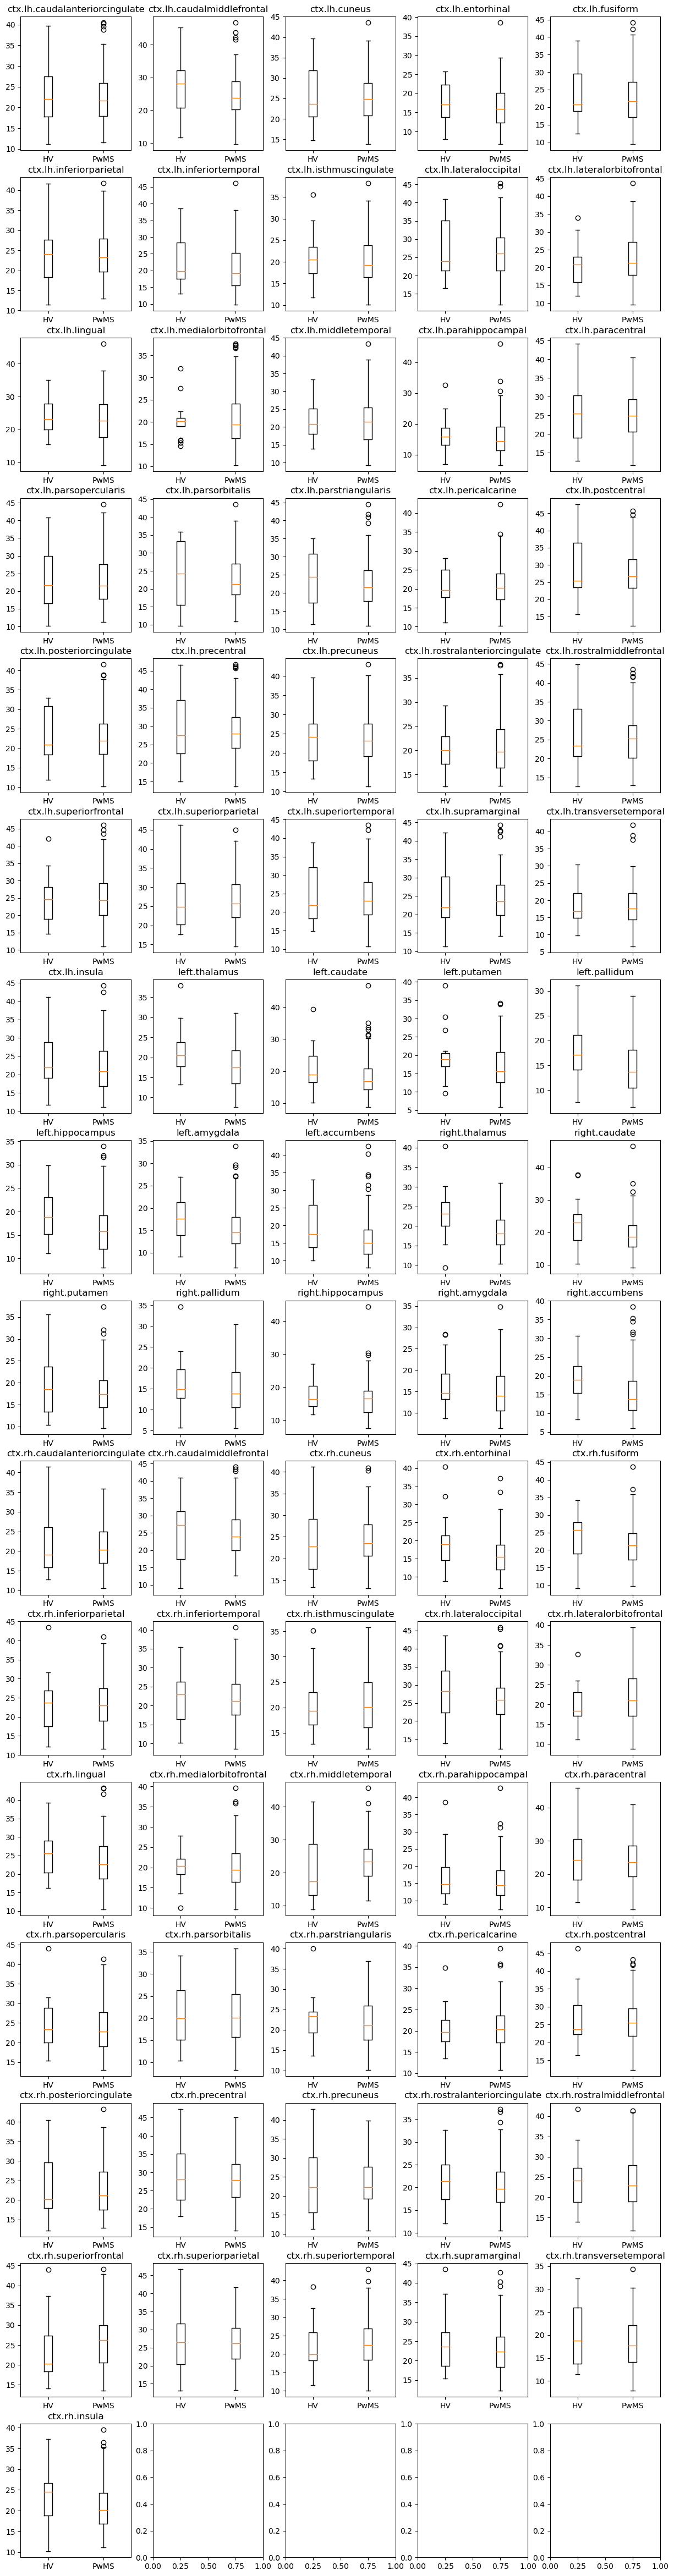

In [43]:
fig, axes = plt.subplots(16,5, figsize=(15,60))

for i in range(rs_nodes_sum.shape[1]):
    data = [HV_rs_nodes_sum[:,i], PwMS_rs_nodes_sum[:,i]]
    row = int(i/5)
    column = i%5
    axes[row, column].boxplot(data, labels=['HV', 'PwMS'])
    axes[row, column].set_title(node_names['region_name'][i])

A continuació, es comprova que la variancia de les mostres per cada node no té per què ser semblant.

In [44]:
print("            HV             PwMS")
print("----------------------------------")
for i in range(NUM_NODES):
    print("Node ", i, ": ", round(np.var(HV_rs_nodes_sum[:,i]),2), " -------- ", round(np.var(PwMS_rs_nodes_sum[:,i]),2))

            HV             PwMS
----------------------------------
Node  0 :  55.57  --------  39.65
Node  1 :  71.78  --------  46.07
Node  2 :  44.89  --------  32.71
Node  3 :  27.1  --------  29.29
Node  4 :  55.34  --------  50.86
Node  5 :  57.03  --------  39.91
Node  6 :  53.41  --------  42.27
Node  7 :  32.22  --------  30.1
Node  8 :  59.51  --------  42.41
Node  9 :  36.6  --------  43.13
Node  10 :  31.09  --------  44.13
Node  11 :  16.51  --------  37.68
Node  12 :  33.18  --------  42.66
Node  13 :  32.92  --------  37.47
Node  14 :  74.18  --------  36.61
Node  15 :  77.1  --------  47.85
Node  16 :  75.61  --------  41.05
Node  17 :  55.24  --------  44.09
Node  18 :  27.62  --------  30.35
Node  19 :  77.38  --------  43.94
Node  20 :  47.75  --------  37.3
Node  21 :  76.47  --------  47.58
Node  22 :  47.24  --------  35.85
Node  23 :  18.65  --------  31.78
Node  24 :  75.71  --------  43.84
Node  25 :  53.74  --------  46.35
Node  26 :  61.68  --------  38.37
Nod

Identifiquem tots els nodes que superen el t-test:

In [45]:
rs_nodes_p_values = get_p_values_nodes(HV_rs_nodes_sum, PwMS_rs_nodes_sum)

rs_nodes_t_test = np.where(rs_nodes_p_values<0.05)[0]
print("Número de nodes que superen el t-test: ", rs_nodes_t_test.shape[0], "\n")
node_indexs = np.argsort(rs_nodes_p_values)[:rs_nodes_t_test.shape[0]]
print(node_names['region_name'][node_indexs])

Número de nodes que superen el t-test:  5 

38      right.thalamus
44     right.accumbens
31       left.thalamus
35    left.hippocampus
39       right.caudate
Name: region_name, dtype: object


##### Comparació

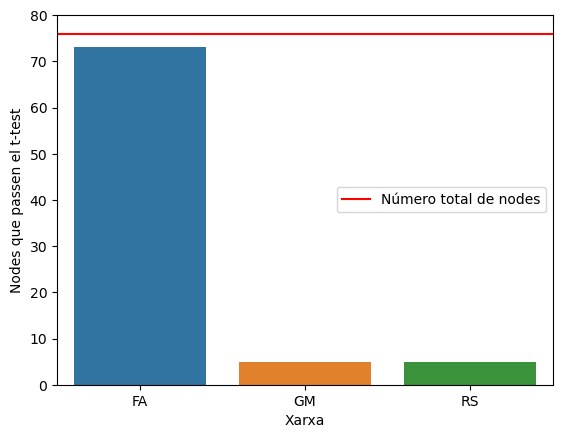

In [132]:
dim1 = fa_nodes_t_test.shape[0]
dim2 = gm_nodes_t_test.shape[0]
dim3 = rs_nodes_t_test.shape[0]

df = pd.DataFrame({'NumNodesTtest': [dim1, dim2, dim3], 'Xarxa': ['FA', 'GM', 'RS']})

ax = sns.barplot(x='Xarxa', y='NumNodesTtest', data=df)
plt.axhline(NUM_NODES, color='red', linestyle='-', label='Número total de nodes')
ax.set_ylim(0, 80)
plt.xlabel('Xarxa')
plt.ylabel('Nodes que passen el t-test')
plt.legend()
plt.show()

#### Anàlisi a partir de les arestes

A continuació, s'analitzarà què tan útil és cada aresta per distingir entre els grups HV i PwMS.

In [46]:
def get_p_values_links(HV_networks, PwMS_networks):
    p_values = np.empty((0))
    rows = np.empty((0), dtype=int)
    columns = np.empty((0), dtype=int)

    for i in range(NUM_NODES):
        for j in range(NUM_NODES):
            if i>j:
                _ , p_value = ttest_ind(HV_networks[:,i,j], PwMS_networks[:,i,j], equal_var=False)
                p_values = np.append(p_values, p_value)
                rows = np.append(rows, i)
                columns = np.append(columns, j)
    
    df_links = pd.DataFrame({'p_value': p_values, 'row': rows, 'column': columns}, columns=['p_value', 'row', 'column'])
    return df_links

In [47]:
def get_node_pass_percentage(relevant_links):
    percentages = np.zeros((NUM_NODES))
    for i in range(NUM_NODES):
        links_ttest = relevant_links[(relevant_links['row'] == i) | (relevant_links['column'] == i)]
        links_count = links_ttest.shape[0]
        percentages[i] = (links_count / NUM_NODES) * 100
    
    return percentages

##### Xarxes FA

In [48]:
# Es separa entre HV i PwMS
HV_fa = fa[HV_index, :, :]
PwMS_fa = fa[PwMS_index, :, :]

print(HV_fa.shape)
print(PwMS_fa.shape)

(18, 76, 76)
(125, 76, 76)


In [49]:
# Calculem els p-values per cada una de les arestes
fa_links = get_p_values_links(HV_fa, PwMS_fa)

fa_links

,p_value,row,column
0,0.012217,1,0
1,NaN,2,0
2,NaN,2,1
3,NaN,3,0
4,NaN,3,1
...,...,...,...
2845,0.015720,75,70
2846,0.000850,75,71
2847,0.001835,75,72
2848,0.002425,75,73


A continuació es comprova que les arestes que han obtingut NaN com a p-value al t-test és perquè tenen 0 com a pes en tots els casos, i per tant no serveixen per distingir entre grups.

In [50]:
fa_nans = fa_links[pd.isna(fa_links['p_value'])]

print(fa_nans.shape)
fa_nans

(1051, 3)


,p_value,row,column
1,NaN,2,0
2,NaN,2,1
3,NaN,3,0
4,NaN,3,1
6,NaN,4,0
...,...,...,...
2809,NaN,75,34
2810,NaN,75,35
2811,NaN,75,36
2812,NaN,75,37


In [51]:
print(fa[:,2,0])
print(fa[:,3,1])
print(fa[:,75,48])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

Obtenim quines arestes passen el t-test.

In [52]:
fa_relevant_links = fa_links[fa_links['p_value'] < 0.05]

print("Nombre d'arestes que passen el t-test: ", fa_relevant_links.shape[0])
fa_relevant_links

Nombre d'arestes que passen el t-test:  1095


,p_value,row,column
0,0.012217,1,0
5,0.001153,3,2
8,0.000136,4,2
11,0.003818,5,1
12,0.007071,5,2
...,...,...,...
2845,0.015720,75,70
2846,0.000850,75,71
2847,0.001835,75,72
2848,0.002425,75,73


Per cada node, calculem quin percentatge de les seves arestes han passat el t-test.

In [53]:
fa_nodes_link_percentage = get_node_pass_percentage(fa_relevant_links)

print("Percentatge d'arestes de cada node que passen el t-test:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(fa_nodes_link_percentage[i], 2), "%")

Percentatge d'arestes de cada node que passen el t-test: 

Node  1 :  31.58 %
Node  2 :  38.16 %
Node  3 :  36.84 %
Node  4 :  13.16 %
Node  5 :  23.68 %
Node  6 :  53.95 %
Node  7 :  34.21 %
Node  8 :  46.05 %
Node  9 :  44.74 %
Node  10 :  23.68 %
Node  11 :  36.84 %
Node  12 :  23.68 %
Node  13 :  39.47 %
Node  14 :  21.05 %
Node  15 :  44.74 %
Node  16 :  28.95 %
Node  17 :  21.05 %
Node  18 :  32.89 %
Node  19 :  39.47 %
Node  20 :  44.74 %
Node  21 :  36.84 %
Node  22 :  40.79 %
Node  23 :  72.37 %
Node  24 :  22.37 %
Node  25 :  40.79 %
Node  26 :  59.21 %
Node  27 :  69.74 %
Node  28 :  39.47 %
Node  29 :  40.79 %
Node  30 :  15.79 %
Node  31 :  51.32 %
Node  32 :  52.63 %
Node  33 :  38.16 %
Node  34 :  53.95 %
Node  35 :  23.68 %
Node  36 :  43.42 %
Node  37 :  14.47 %
Node  38 :  11.84 %
Node  39 :  68.42 %
Node  40 :  47.37 %
Node  41 :  47.37 %
Node  42 :  31.58 %
Node  43 :  46.05 %
Node  44 :  14.47 %
Node  45 :  15.79 %
Node  46 :  23.68 %
Node  47 :  36.84 %
Node  48 :

[Text(0.5, 1.0, 'Histograma dels percentatges')]

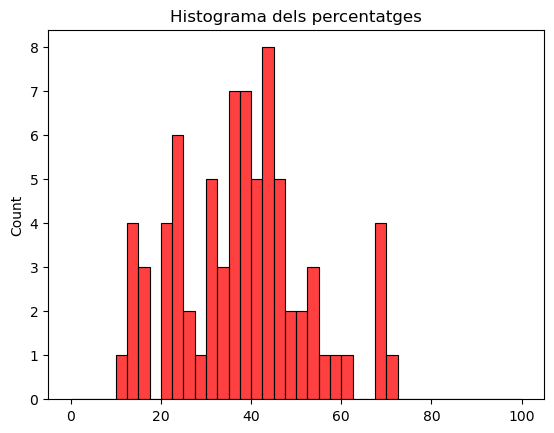

In [54]:
sns.histplot(x=fa_nodes_link_percentage, color ='red', bins=40, binrange=(0,100)).set(title='Histograma dels percentatges')

##### Xarxes GM

In [55]:
# Es separa entre HV i PwMS
HV_gm = gm[HV_index, :, :]
PwMS_gm = gm[PwMS_index, :, :]

print(HV_gm.shape)
print(PwMS_gm.shape)

(18, 76, 76)
(125, 76, 76)


In [56]:
# Calculem els p-values per cada una de les arestes
gm_links = get_p_values_links(HV_gm, PwMS_gm)

gm_links

C:\Users\marti\AppData\Local\Temp\ipykernel_23024\695015159.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _ , p_value = ttest_ind(HV_networks[:,i,j], PwMS_networks[:,i,j], equal_var=False)


,p_value,row,column
0,0.390145,1,0
1,0.727809,2,0
2,0.340382,2,1
3,0.399229,3,0
4,0.068653,3,1
...,...,...,...
2845,0.681773,75,70
2846,0.391955,75,71
2847,0.692952,75,72
2848,0.318834,75,73


Obtenim quines arestes passen el t-test

In [57]:
gm_relevant_links = gm_links[gm_links['p_value'] < 0.05]

print("Nombre d'arestes que passen el t-test: ", gm_relevant_links.shape[0])
gm_relevant_links

Nombre d'arestes que passen el t-test:  306


,p_value,row,column
7,0.044037,4,1
16,0.033757,6,1
37,0.021648,9,1
39,0.039057,9,3
42,0.031423,9,6
...,...,...,...
2669,0.035784,73,41
2670,0.014723,73,42
2671,0.023189,73,43
2676,0.040595,73,48


Per cada node, calculem quin percentatge de les seves arestes han passat el t-test.

In [58]:
gm_nodes_link_percentage = get_node_pass_percentage(gm_relevant_links)

print("Percentatge d'arestes de cada node que passen el t-test:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(gm_nodes_link_percentage[i], 2), "%")

Percentatge d'arestes de cada node que passen el t-test: 

Node  1 :  1.32 %
Node  2 :  31.58 %
Node  3 :  0.0 %
Node  4 :  3.95 %
Node  5 :  9.21 %
Node  6 :  0.0 %
Node  7 :  15.79 %
Node  8 :  0.0 %
Node  9 :  0.0 %
Node  10 :  28.95 %
Node  11 :  0.0 %
Node  12 :  1.32 %
Node  13 :  36.84 %
Node  14 :  21.05 %
Node  15 :  22.37 %
Node  16 :  1.32 %
Node  17 :  25.0 %
Node  18 :  43.42 %
Node  19 :  5.26 %
Node  20 :  2.63 %
Node  21 :  3.95 %
Node  22 :  6.58 %
Node  23 :  14.47 %
Node  24 :  1.32 %
Node  25 :  34.21 %
Node  26 :  15.79 %
Node  27 :  1.32 %
Node  28 :  2.63 %
Node  29 :  1.32 %
Node  30 :  6.58 %
Node  31 :  0.0 %
Node  32 :  10.53 %
Node  33 :  0.0 %
Node  34 :  0.0 %
Node  35 :  0.0 %
Node  36 :  42.11 %
Node  37 :  18.42 %
Node  38 :  11.84 %
Node  39 :  13.16 %
Node  40 :  3.95 %
Node  41 :  0.0 %
Node  42 :  25.0 %
Node  43 :  39.47 %
Node  44 :  44.74 %
Node  45 :  5.26 %
Node  46 :  1.32 %
Node  47 :  0.0 %
Node  48 :  15.79 %
Node  49 :  27.63 %
Node  50 : 

[Text(0.5, 1.0, 'Histograma dels percentatges')]

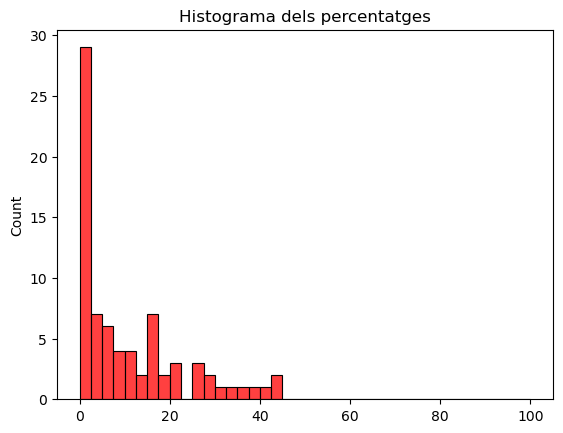

In [59]:
sns.histplot(x=gm_nodes_link_percentage, color ='red', bins=40, binrange=(0,100)).set(title='Histograma dels percentatges')

##### Xarxes RS

In [60]:
# Es separa entre HV i PwMS
HV_rs = rs[HV_index, :, :]
PwMS_rs = rs[PwMS_index, :, :]

print(HV_rs.shape)
print(PwMS_rs.shape)

(18, 76, 76)
(125, 76, 76)


In [61]:
# Calculem els p-values per cada una de les arestes
rs_links = get_p_values_links(HV_rs, PwMS_rs)

rs_links

,p_value,row,column
0,0.823733,1,0
1,0.654146,2,0
2,0.106231,2,1
3,0.624963,3,0
4,0.602645,3,1
...,...,...,...
2845,0.503725,75,70
2846,0.689167,75,71
2847,0.183784,75,72
2848,0.685891,75,73


Obtenim quines arestes passen el t-test

In [62]:
rs_relevant_links = rs_links[rs_links['p_value'] < 0.05]

print("Nombre d'arestes que passen el t-test: ", rs_relevant_links.shape[0])
rs_relevant_links

Nombre d'arestes que passen el t-test:  159


,p_value,row,column
56,0.017748,11,1
97,0.020717,14,6
229,0.018260,21,19
258,0.003881,23,5
260,0.034493,23,7
...,...,...,...
2734,0.044953,74,33
2745,0.041053,74,44
2753,0.033660,74,52
2778,0.033707,75,3


Per cada node, calculem quin percentatge de les seves arestes han passat el t-test.

In [63]:
rs_nodes_link_percentage = get_node_pass_percentage(rs_relevant_links)

print("Percentatge d'arestes de cada node que passen el t-test:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(rs_nodes_link_percentage[i], 2), "%")

Percentatge d'arestes de cada node que passen el t-test: 

Node  1 :  1.32 %
Node  2 :  7.89 %
Node  3 :  2.63 %
Node  4 :  2.63 %
Node  5 :  1.32 %
Node  6 :  6.58 %
Node  7 :  9.21 %
Node  8 :  10.53 %
Node  9 :  3.95 %
Node  10 :  3.95 %
Node  11 :  1.32 %
Node  12 :  6.58 %
Node  13 :  9.21 %
Node  14 :  3.95 %
Node  15 :  2.63 %
Node  16 :  2.63 %
Node  17 :  5.26 %
Node  18 :  6.58 %
Node  19 :  0.0 %
Node  20 :  1.32 %
Node  21 :  5.26 %
Node  22 :  5.26 %
Node  23 :  3.95 %
Node  24 :  13.16 %
Node  25 :  0.0 %
Node  26 :  2.63 %
Node  27 :  2.63 %
Node  28 :  2.63 %
Node  29 :  0.0 %
Node  30 :  9.21 %
Node  31 :  2.63 %
Node  32 :  14.47 %
Node  33 :  6.58 %
Node  34 :  6.58 %
Node  35 :  9.21 %
Node  36 :  18.42 %
Node  37 :  3.95 %
Node  38 :  7.89 %
Node  39 :  10.53 %
Node  40 :  11.84 %
Node  41 :  0.0 %
Node  42 :  2.63 %
Node  43 :  5.26 %
Node  44 :  1.32 %
Node  45 :  18.42 %
Node  46 :  3.95 %
Node  47 :  6.58 %
Node  48 :  2.63 %
Node  49 :  13.16 %
Node  50 :  5.2

[Text(0.5, 1.0, 'Histograma dels percentatges')]

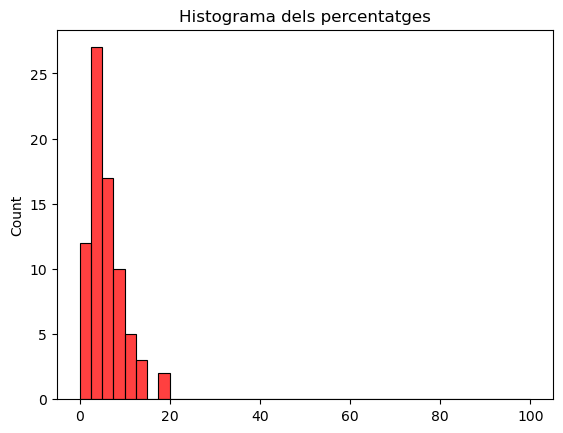

In [64]:
sns.histplot(x=rs_nodes_link_percentage, color ='red', bins=40, binrange=(0,100)).set(title='Histograma dels percentatges')

##### Comparació

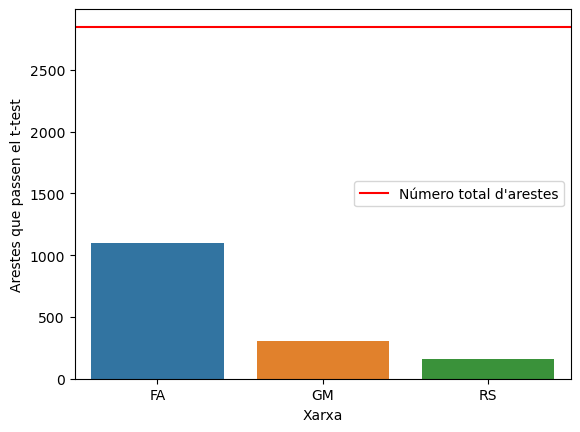

In [140]:
dim1 = fa_relevant_links.shape[0]
dim2 = gm_relevant_links.shape[0]
dim3 = rs_relevant_links.shape[0]

df = pd.DataFrame({'NumLinksTtest': [dim1, dim2, dim3], 'Xarxa': ['FA', 'GM', 'RS']})

ax = sns.barplot(x='Xarxa', y='NumLinksTtest', data=df)
plt.axhline(NUM_ARESTES, color='red', linestyle='-', label="Número total d'arestes")
#ax.set_ylim(0, 80)
plt.xlabel('Xarxa')
plt.ylabel('Arestes que passen el t-test')
plt.legend()
plt.show()

### Anàlisi dels valors d'EDSS

En aquest apartat es farà un anàlisi de la relació entre els nodes de les xarxes i els valors de EDSS de cada persona. Per fer-ho, es calcularà la correlació entre els degree de cada node i els valors de EDSS.

#### Xarxes FA

In [65]:
fa_edss_correlations = np.array([])

for i in range(fa_nodes_sum.shape[1]):
    node_i = fa_nodes_sum[:,i]
    df_node_i = pd.Series(node_i)
    correlation = clinical_data['edss'].corr(df_node_i)
    fa_edss_correlations = np.append(fa_edss_correlations, correlation)
fa_edss_correlations = np.absolute(fa_edss_correlations)

print("Correlació de cada node amb l'EDSS:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(fa_edss_correlations[i], 3))

Correlació de cada node amb l'EDSS: 

Node  1 :  0.25
Node  2 :  0.261
Node  3 :  0.313
Node  4 :  0.364
Node  5 :  0.313
Node  6 :  0.323
Node  7 :  0.31
Node  8 :  0.215
Node  9 :  0.302
Node  10 :  0.265
Node  11 :  0.32
Node  12 :  0.247
Node  13 :  0.342
Node  14 :  0.281
Node  15 :  0.421
Node  16 :  0.211
Node  17 :  0.269
Node  18 :  0.224
Node  19 :  0.248
Node  20 :  0.381
Node  21 :  0.285
Node  22 :  0.292
Node  23 :  0.341
Node  24 :  0.295
Node  25 :  0.276
Node  26 :  0.348
Node  27 :  0.377
Node  28 :  0.376
Node  29 :  0.349
Node  30 :  0.321
Node  31 :  0.214
Node  32 :  0.248
Node  33 :  0.33
Node  34 :  0.295
Node  35 :  0.161
Node  36 :  0.33
Node  37 :  0.219
Node  38 :  0.262
Node  39 :  0.228
Node  40 :  0.387
Node  41 :  0.289
Node  42 :  0.187
Node  43 :  0.366
Node  44 :  0.278
Node  45 :  0.454
Node  46 :  0.243
Node  47 :  0.333
Node  48 :  0.307
Node  49 :  0.218
Node  50 :  0.209
Node  51 :  0.354
Node  52 :  0.279
Node  53 :  0.315
Node  54 :  0.347
Node

[Text(0.5, 1.0, 'Histograma de les correlacions')]

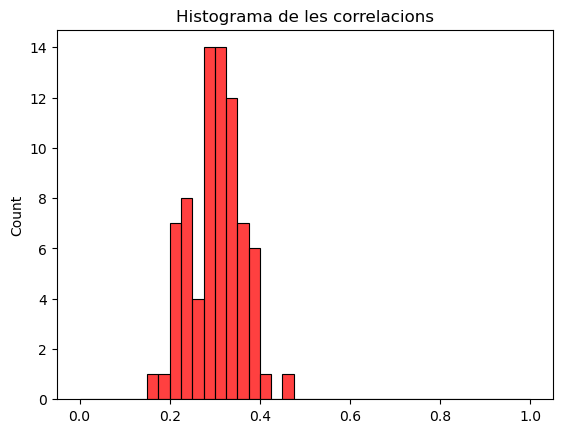

In [66]:
sns.histplot(x=fa_edss_correlations, color ='red', bins=40, binrange=(0,1)).set(title='Histograma de les correlacions')

In [67]:
pd.DataFrame(fa_edss_correlations).describe()

,0
count,76.000000
mean,0.302873
std,0.057591
min,0.161421
25%,0.264573
50%,0.311515
75%,0.342951
max,0.453711


In [141]:
print(fa_edss_correlations)

[0.2497946  0.26103892 0.31324148 0.36375755 0.3134199  0.32277327
 0.30978823 0.21462549 0.30187856 0.26546966 0.31964004 0.24718545
 0.3422082  0.28124766 0.42053421 0.21136485 0.26908131 0.22392556
 0.24840224 0.38063009 0.28502021 0.29234182 0.34068109 0.29537722
 0.27622174 0.34817903 0.37726305 0.37564449 0.34888456 0.32133399
 0.21355461 0.2481384  0.32962364 0.2948275  0.1614212  0.32984364
 0.21880327 0.261884   0.22784559 0.38724241 0.28878603 0.18702213
 0.36590031 0.27801193 0.45371092 0.24265026 0.33305905 0.30716067
 0.21783365 0.20859897 0.35431074 0.27913733 0.31512512 0.34715566
 0.31520783 0.3415412  0.31496134 0.31861914 0.28542415 0.37660933
 0.27857969 0.29257084 0.31433103 0.34518084 0.36794057 0.23600693
 0.37020499 0.33615527 0.22594737 0.35626695 0.36143534 0.39631852
 0.33356124 0.31465009 0.2890249  0.27517463]


#### Xarxes GM

In [68]:
gm_edss_correlations = np.array([])

for i in range(gm_nodes_sum.shape[1]):
    node_i = gm_nodes_sum[:,i]
    df_node_i = pd.Series(node_i)
    correlation = clinical_data['edss'].corr(df_node_i)
    gm_edss_correlations = np.append(gm_edss_correlations, correlation)
gm_edss_correlations = np.absolute(gm_edss_correlations)

print("Correlació de cada node amb l'EDSS:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(gm_edss_correlations[i], 3))

Correlació de cada node amb l'EDSS: 

Node  1 :  0.144
Node  2 :  0.179
Node  3 :  0.198
Node  4 :  0.197
Node  5 :  0.161
Node  6 :  0.14
Node  7 :  0.192
Node  8 :  0.112
Node  9 :  0.126
Node  10 :  0.19
Node  11 :  0.12
Node  12 :  0.085
Node  13 :  0.209
Node  14 :  0.27
Node  15 :  0.004
Node  16 :  0.093
Node  17 :  0.152
Node  18 :  0.159
Node  19 :  0.13
Node  20 :  0.091
Node  21 :  0.187
Node  22 :  0.008
Node  23 :  0.155
Node  24 :  0.142
Node  25 :  0.163
Node  26 :  0.244
Node  27 :  0.168
Node  28 :  0.153
Node  29 :  0.128
Node  30 :  0.159
Node  31 :  0.225
Node  32 :  0.105
Node  33 :  0.018
Node  34 :  0.121
Node  35 :  0.008
Node  36 :  0.27
Node  37 :  0.205
Node  38 :  0.052
Node  39 :  0.164
Node  40 :  0.089
Node  41 :  0.117
Node  42 :  0.042
Node  43 :  0.22
Node  44 :  0.184
Node  45 :  0.122
Node  46 :  0.07
Node  47 :  0.179
Node  48 :  0.184
Node  49 :  0.239
Node  50 :  0.132
Node  51 :  0.145
Node  52 :  0.146
Node  53 :  0.078
Node  54 :  0.068
Node  5

[Text(0.5, 1.0, 'Histograma de les correlacions')]

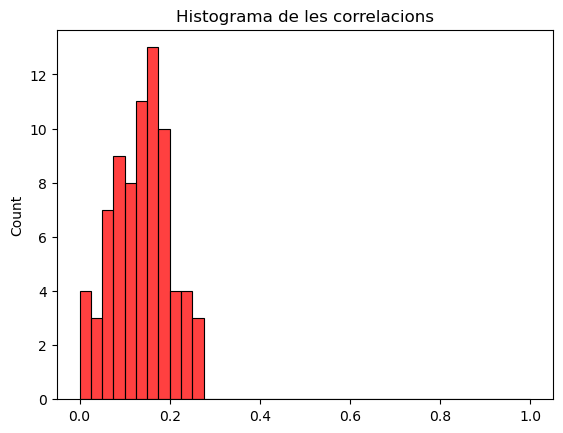

In [69]:
sns.histplot(x=gm_edss_correlations, color ='red', bins=40, binrange=(0,1)).set(title='Histograma de les correlacions')

In [70]:
pd.DataFrame(gm_edss_correlations).describe()

,0
count,76.000000
mean,0.136081
std,0.063967
min,0.003649
25%,0.090954
50%,0.142707
75%,0.179507
max,0.269935


#### Xarxes RS

In [71]:
rs_edss_correlations = np.array([])

for i in range(rs_nodes_sum.shape[1]):
    node_i = rs_nodes_sum[:,i]
    df_node_i = pd.Series(node_i)
    correlation = clinical_data['edss'].corr(df_node_i)
    rs_edss_correlations = np.append(rs_edss_correlations, correlation)
rs_edss_correlations = np.absolute(rs_edss_correlations)

print("Correlació de cada node amb l'EDSS:", "\n")

for i in range(NUM_NODES):
    print("Node ", i+1, ": ", round(rs_edss_correlations[i], 3))

Correlació de cada node amb l'EDSS: 

Node  1 :  0.077
Node  2 :  0.112
Node  3 :  0.081
Node  4 :  0.044
Node  5 :  0.035
Node  6 :  0.141
Node  7 :  0.159
Node  8 :  0.008
Node  9 :  0.076
Node  10 :  0.042
Node  11 :  0.107
Node  12 :  0.048
Node  13 :  0.047
Node  14 :  0.022
Node  15 :  0.094
Node  16 :  0.056
Node  17 :  0.081
Node  18 :  0.051
Node  19 :  0.09
Node  20 :  0.1
Node  21 :  0.002
Node  22 :  0.096
Node  23 :  0.045
Node  24 :  0.001
Node  25 :  0.092
Node  26 :  0.075
Node  27 :  0.098
Node  28 :  0.106
Node  29 :  0.072
Node  30 :  0.005
Node  31 :  0.005
Node  32 :  0.144
Node  33 :  0.181
Node  34 :  0.07
Node  35 :  0.07
Node  36 :  0.012
Node  37 :  0.005
Node  38 :  0.159
Node  39 :  0.205
Node  40 :  0.135
Node  41 :  0.034
Node  42 :  0.062
Node  43 :  0.073
Node  44 :  0.059
Node  45 :  0.198
Node  46 :  0.038
Node  47 :  0.0
Node  48 :  0.042
Node  49 :  0.004
Node  50 :  0.083
Node  51 :  0.136
Node  52 :  0.035
Node  53 :  0.038
Node  54 :  0.023
Node  

[Text(0.5, 1.0, 'Histograma de les correlacions')]

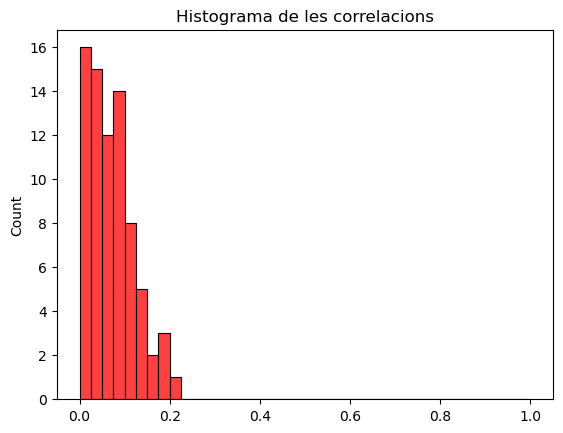

In [72]:
sns.histplot(x=rs_edss_correlations, color ='red', bins=40, binrange=(0,1)).set(title='Histograma de les correlacions')

In [73]:
pd.DataFrame(rs_edss_correlations).describe()

,0
count,76.000000
mean,0.070840
std,0.050793
min,0.000171
25%,0.032322
50%,0.068418
75%,0.098476
max,0.204717


#### Comparació

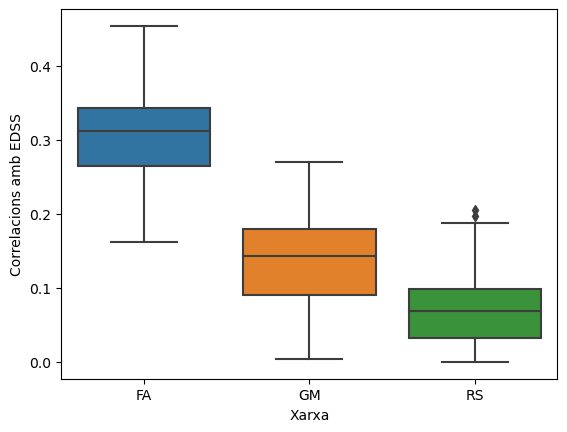

In [158]:
df = pd.DataFrame({'Xarxa': np.repeat(['FA', 'GM', 'RS'], NUM_NODES),'Value': np.concatenate([fa_edss_correlations, gm_edss_correlations, rs_edss_correlations])})

sns.boxplot(x='Xarxa', y='Value', data=df)
plt.xlabel('Xarxa')
plt.ylabel('Correlacions amb EDSS')
plt.show()

### Aplicació de thresholds a les xarxes

Degut a la poca quantitat de nodes que han passat el t-test a les xarxes GM i RS, en aquest apartat es provarà de modificar els valors d'aquestes xarxes mitjançant un threshold, per veure si d'aquesta forma es milloren els resultats.

Es provaran diversos valors com a thresholds, i per cada valor es provarà tant binaritzant, és a dir deixar els valors per sota del threshold a 0 i els valors per sobre del threshold a 1, com no binaritzant, és a dir mantenint igual els valors que es troben per sobre del threshold.

In [74]:
def apply_threshold(networks, thres, binarize):
    if binarize:
        new_networks = np.where(networks < thres, 0, 1)
    else:
        new_networks = np.where(networks < thres, 0, networks)
    return new_networks

#### A les xarxes GM

In [97]:
for thres in np.arange(0.0025, 0.041, 0.0025):
    for binarize in [True, False]:
        filtered_gm = apply_threshold(gm, thres, binarize)

        filtered_nodes_sum = get_nodes_sum(filtered_gm)
        HV_filtered = filtered_nodes_sum[HV_index, :]
        PwMS_filtered = filtered_nodes_sum[PwMS_index, :]
        p_values = get_p_values_nodes(HV_filtered, PwMS_filtered)
        small_p_values = np.where(p_values<0.05)

        print("Threshold: ", round(thres,4), "; Binarize: ", str(binarize), " - ", small_p_values[0].shape[0], " nodes passen el t-test")
    print("----------------------------------------------------------------------")

C:\Users\marti\AppData\Local\Temp\ipykernel_23024\1708151032.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _ , p_value = ttest_ind(HV_nodes_sum[:,i], PwMS_nodes_sum[:,i], equal_var=False)


Threshold:  0.0025 ; Binarize:  True  -  2  nodes passen el t-test
Threshold:  0.0025 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.005 ; Binarize:  True  -  5  nodes passen el t-test
Threshold:  0.005 ; Binarize:  False  -  4  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.0075 ; Binarize:  True  -  5  nodes passen el t-test
Threshold:  0.0075 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.01 ; Binarize:  True  -  2  nodes passen el t-test
Threshold:  0.01 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.0125 ; Binarize:  True  -  3  nodes passen el t-test
Threshold:  0.0125 ; Binarize:  False  -  4  nodes passen el t-test
-----------------------------------------------

Visualització amb els valors òptims:

In [96]:
threshold_gm = 0.04
binarize_gm = False

print("Valors per sota del threshold: ", np.count_nonzero(gm<threshold_gm))
print("Valors per sobre del threshold: ", np.count_nonzero(gm>=threshold_gm))

Valors per sota del threshold:  414544
Valors per sobre del threshold:  411424


[Text(0.5, 1.0, 'Histograma de valors de les matrius GM amb el threshold aplicat')]

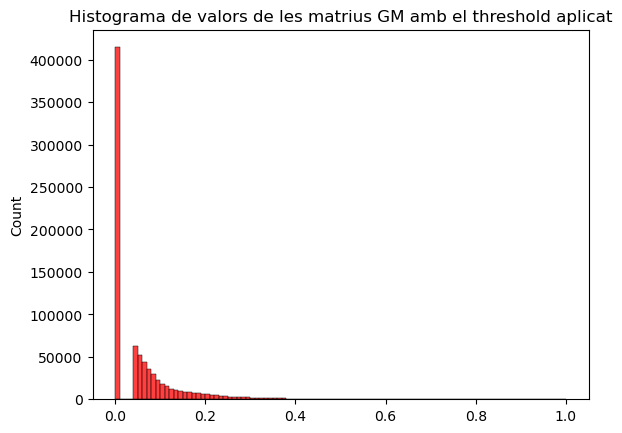

In [77]:
filtered_gm = apply_threshold(gm, threshold_gm, binarize_gm)
filtered_gm_values = filtered_gm.flatten()

sns.histplot(x=filtered_gm_values, color ='red', bins=100).set(title='Histograma de valors de les matrius GM amb el threshold aplicat')

In [78]:
filtered_gm_nodes_sum = get_nodes_sum(filtered_gm)
HV_filtered_gm = filtered_gm_nodes_sum[HV_index, :]
PwMS_filtered_gm = filtered_gm_nodes_sum[PwMS_index, :]
filtered_gm_p_values = get_p_values_nodes(HV_filtered_gm, PwMS_filtered_gm)

f_gm_nodes_t_test = np.where(filtered_gm_p_values<0.05)[0]
print("Número de nodes que passen el t-test: ", f_gm_nodes_t_test.shape[0], "\n")
node_indexs = np.argsort(filtered_gm_p_values)[:f_gm_nodes_t_test.shape[0]]
print(node_names['region_name'][node_indexs])

Número de nodes que passen el t-test:  8 

43                 right.amygdala
24    ctx.lh.rostralmiddlefrontal
17        ctx.lh.parstriangularis
36                  left.amygdala
35               left.hippocampus
48              ctx.rh.entorhinal
1      ctx.lh.caudalmiddlefrontal
9     ctx.lh.lateralorbitofrontal
Name: region_name, dtype: object


#### A les xarxes RS

In [99]:
for thres in np.arange(0.01, 0.251, 0.01):
    for binarize in [True, False]:
        filtered_rs = apply_threshold(rs, thres, binarize)

        filtered_nodes_sum = get_nodes_sum(filtered_rs)
        HV_filtered = filtered_nodes_sum[HV_index, :]
        PwMS_filtered = filtered_nodes_sum[PwMS_index, :]
        p_values = get_p_values_nodes(HV_filtered, PwMS_filtered)
        small_p_values = np.where(p_values<0.05)

        print("Threshold: ", round(thres,3), "; Binarize: ", str(binarize), " - ", small_p_values[0].shape[0], " nodes passen el t-test")
    print("----------------------------------------------------------------------")

Threshold:  0.01 ; Binarize:  True  -  5  nodes passen el t-test
Threshold:  0.01 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.02 ; Binarize:  True  -  2  nodes passen el t-test
Threshold:  0.02 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.03 ; Binarize:  True  -  4  nodes passen el t-test
Threshold:  0.03 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.04 ; Binarize:  True  -  4  nodes passen el t-test
Threshold:  0.04 ; Binarize:  False  -  5  nodes passen el t-test
----------------------------------------------------------------------
Threshold:  0.05 ; Binarize:  True  -  3  nodes passen el t-test
Threshold:  0.05 ; Binarize:  False  -  5  nodes passen el t-test
-------------------------------------------------------------

Visualització amb els valors òptims:

In [80]:
# Cap dels thresholds consegueix millorar els resultats, per tant ho mantenim igual
threshold_rs = 0
binarize_rs = False

print("Valors per sota del threshold: ", np.count_nonzero(rs<threshold_rs))
print("Valors per sobre del threshold: ", np.count_nonzero(rs>=threshold_rs))

Valors per sota del threshold:  0
Valors per sobre del threshold:  825968


[Text(0.5, 1.0, 'Histograma de valors de les matrius RS amb el threshold aplicat')]

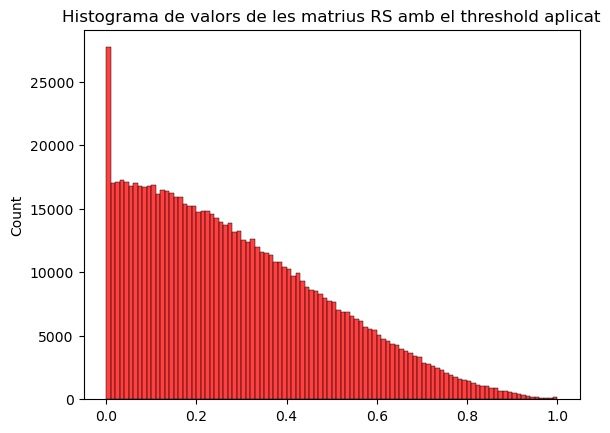

In [81]:
filtered_rs = apply_threshold(rs, threshold_rs, binarize_rs)
filtered_rs_values = filtered_rs.flatten()

sns.histplot(x=filtered_rs_values, color ='red', bins=100).set(title='Histograma de valors de les matrius RS amb el threshold aplicat')

In [82]:
filtered_rs_nodes_sum = get_nodes_sum(filtered_rs)
HV_filtered_rs = filtered_rs_nodes_sum[HV_index, :]
PwMS_filtered_rs = filtered_rs_nodes_sum[PwMS_index, :]
filtered_rs_p_values = get_p_values_nodes(HV_filtered_rs, PwMS_filtered_rs)

f_rs_nodes_t_test = np.where(filtered_rs_p_values<0.05)[0]
print("Número de nodes que passen el t-test: ", f_rs_nodes_t_test.shape[0], "\n")
node_indexs = np.argsort(filtered_rs_p_values)[:f_rs_nodes_t_test.shape[0]]
print(node_names['region_name'][node_indexs])

Número de nodes que passen el t-test:  5 

38      right.thalamus
44     right.accumbens
31       left.thalamus
35    left.hippocampus
39       right.caudate
Name: region_name, dtype: object


#### Comparació

A continuació, es mostra un diagrama de Venn per analitzar les interseccions i diferències entre els tres conjunts de nodes que han passat el t-test en cadascuna de les tres xarxes. En el cas de les xarxes GM i RS, s'utilitzen els valors processats amb el threshold.

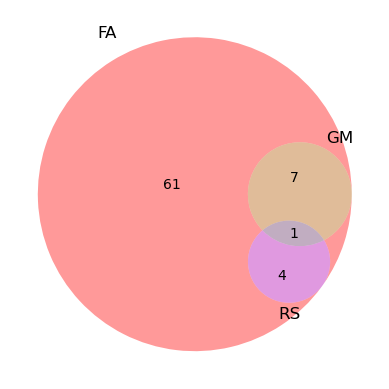

In [83]:
set1 = set(fa_nodes_t_test)
set2 = set(f_gm_nodes_t_test)
set3 = set(f_rs_nodes_t_test)

venn3([set1, set2, set3], ('FA', 'GM', 'RS'))
plt.show()

## FEATURE SELECTION

En aquest apartat s'estableixen diferents estratègies de selecció de les xarxes i nodes que s'utilitzaran.

### Single-layer FA

En el primer dels casos s'utilitzarà una xarxa single-layer utilitzant simplement les matrius FA.

In [84]:
network_1 = fa

print(fa.shape)

(143, 76, 76)


### Multi-layer

En el segon dels casos, es crearà una multi-layer network a partir de les tres xarxes disponibles, amb els valors originals i sense cap filtratge de nodes. S'estableix la xarxa FA com a interlayer.

In [85]:
# funció que crea una xarxa multilayer a partir de tres capes
def create_multilayer(layer1, layer2, inter):
    n_subjects = layer1.shape[0]
    n_nodes = layer1.shape[1]

    multilayer = np.empty((n_subjects, n_nodes*2, n_nodes*2))
    multilayer[:,:n_nodes,:n_nodes] = layer1
    multilayer[:,:n_nodes,n_nodes:] = inter
    multilayer[:,n_nodes:,:n_nodes] = inter
    multilayer[:,n_nodes:,n_nodes:] = layer2

    return multilayer

In [86]:
network2 = create_multilayer(gm, rs, fa)

print(network2.shape)

(143, 152, 152)


### Multi-layer amb thresholds

En el tercer dels casos, es crearà també una multi-layer network amb les tres xarxes disponibles, però les xarxes GM i RS tindran els thresholds aplicats. S'estableix la xarxa FA com a interlayer.

In [87]:
network3 = create_multilayer(filtered_gm, filtered_rs, fa)

print(network3.shape)

(143, 152, 152)


### Multi-layer amb thresholds i selecció de nodes

En el quart dels casos, es crearà una multi-layer network amb els thresholds aplicats a les xarxes GM i RS, però en aquest cas es seleccionaran únicament els nodes que han passat el t-test a la xarxa FA. S'estableix la xarxa FA com a interlayer.

In [88]:
# funció que retorna les xarxes mantenint únicament els nodes especificats
def select_nodes(networks, nodes):
    new_networks = networks[:,nodes,:]
    new_networks = new_networks[:,:,nodes]
    return new_networks

In [89]:
network4_nodes = fa_nodes_t_test

print("Número de nodes seleccionats: ", network4_nodes.shape[0])

fa_aux = select_nodes(fa, network4_nodes)
gm_aux = select_nodes(filtered_gm, network4_nodes)
rs_aux = select_nodes(filtered_rs, network4_nodes)

network4 = create_multilayer(gm_aux, rs_aux, fa_aux)

print(network4.shape)

Número de nodes seleccionats:  73
(143, 146, 146)


### Multi-layer amb thresholds i selecció de nodes més restrictiva

En el cinquè dels casos, es crearà una multi-layer network amb els thresholds aplicats a les xarxes GM i RS, però en aquest cas es seleccionaran únicament els nodes que hagin passat el t-test en almenys dues de les xarxes. S'estableix la xarxa FA com a interlayer.

In [90]:
fa_gm_nodes = np.intersect1d(fa_nodes_t_test, f_gm_nodes_t_test)
fa_rs_nodes = np.intersect1d(fa_nodes_t_test, f_rs_nodes_t_test)
gm_rs_nodes = np.intersect1d(f_gm_nodes_t_test, f_rs_nodes_t_test)
network5_nodes = np.concatenate((fa_gm_nodes, fa_rs_nodes, gm_rs_nodes))
network5_nodes = np.unique(network5_nodes)

print("Número de nodes seleccionats: ", network5_nodes.shape[0])

fa_aux = select_nodes(fa, network5_nodes)
gm_aux = select_nodes(filtered_gm, network5_nodes)
rs_aux = select_nodes(filtered_rs, network5_nodes)

network5 = create_multilayer(gm_aux, rs_aux, fa_aux)

print(network5.shape)

Número de nodes seleccionats:  12
(143, 24, 24)
